# Markab Challenge - starter notebook

In [ ]:
### Add team name and model name here ###
team_name = 'Team_name' 
model_name = 'model_name'

## Introduction
    Througout the scientific community, a vast amount of information is contained within figures in papers, reports, and books. Without the raw data, this information can be lost altogether. We can increase our collective knowledge as a community if we develop a way to extract this information and convert it to a useful format for agregation and downstream analysis.

## Problem statement
    Data points
    
    The goal of this challenge is to be able to extract the data points from a plot into a datatable listed the xy coordinates and symbol. Symbols are recorded as a number in the order appearing on the legend. 
    
    [(X, Y, Z), (X, Y, Z), ...]
    
    X = X coordinate
    Y = Y coordinate
    Z = Symbol (number - order on legend)
    
    Ex: [(25, 162, 1), (32, 62, 2), ...]

## Data description
    1. Image files containing one graph per file.
    2. CSV file containing the image file name marker coordinates. These labels are to be used to train and test the model on the associated graphs.

## Shared imports

In [1]:
import os
import cv2
import json
import random as rnd
import copy
import re
import platform
import sys

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from glob import glob
from pprint import pprint
from sklearn import metrics

## Dataset paths

In [ ]:
DATA_ROOT = "./../../../utilities-master-axis_detection_challenge/axis_detection_challenge/markab_challenge_dataset_test" # Adjust this path to reflect where the data is stored on your personal computer
IMAGE_DATASET_PATH = f"{DATA_ROOT}/images"
LABELS_DATA_PATH = f"{DATA_ROOT}/labels" 

In [ ]:
PROCESSED_DATASET_PATH=f"{DATA_ROOT}/processed"
MODELS_ROOT_PATH=f"./models"
MODEL_PATH=f"{MODELS_ROOT_PATH}/{model_name}"

## Data file exploration

In [ ]:
 def read_image_filenames(path):
    extensions = ["*.png"]
    image_filenames = []
    for ext in extensions:
        image_filenames.extend(glob(os.path.join(path, ext)))
    return image_filenames

In [ ]:
image_filenames = read_image_filenames(IMAGE_DATASET_PATH) 

In [ ]:
pprint(image_filenames[0:5]) 

In [ ]:
 def read_label_filenames(path):
    extensions = ["*.csv"]
    label_filenames = []
    for ext in extensions:
        label_filenames.extend(glob(os.path.join(path, ext)))
    return label_filenames

In [ ]:
label_filenames = read_label_filenames(LABELS_DATA_PATH) 

In [ ]:
pprint(label_filenames) 

## Import data labels

In [ ]:
def import_labels (label):
    labels = pd.read_csv(label[0])
    return labels


In [ ]:
labels = import_labels(label_filenames)

## Preview data
    Here are the first 5 examples of the labels. Each row corresponds to a different graph.

In [ ]:
pprint(labels.head())

## Image import

In [ ]:
def read_image(image_filenames):
    image = cv2.imread(image_filenames) 
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB) 

## Preview selected images

In [ ]:
def preview_images(image_filenames):
    figsize=(20,20)
    nrows = len(image_filenames)
    ncols = 1
    fig, (axes) = plt.subplots(nrows, ncols, figsize=figsize, dpi=120)

    for i in range(nrows):
        img_filename = image_filenames[i]
        image = read_image(img_filename)

        axis = axes[i] if nrows > 1 else axes
        axis.imshow(image)

        title = os.path.basename(img_filename)
        axis.set_title(title)

    plt.show()

In [ ]:
PREVIEW_IMAGES_COUNT=5
rnd.seed(101)
preview_image_filenames=rnd.sample(image_filenames, k=PREVIEW_IMAGES_COUNT)
pprint(preview_image_filenames)

One way to tackle this problem is to consider the coordinates of the image elements. Here are the first 5 graphs as an example. Each graph is saved as separate png file.

In [ ]:
preview_images(preview_image_filenames) 

## Potential pipeline code
    The following code can be used to create your model pipeline. These functions outline suggested steps to help create the model. These functions are suggestions and you may change or edit as you see fit to create the desired functionality.


## Data processing

In [ ]:
 def process_data(image_dataset_path, PROCESSED_DATASET_PATH):
    """
    Includes splitting, scaling, or extracting features from raw source images, which can then be used to train the model.    
    """
    ### PUT YOUR CODE HERE ###
    
    pass

## Dataset split

In [ ]:
def split_dataset(PROCESSED_DATASET_PATH, labels):
    """
    Split dataset files into train and test datasets.
    Depending on your method of data processing, model training, and model testing, we recommend a method that doesn't copy/move images.
    Instead, it returns lists of image filenames per each dataset. Modify subsequent code to match your method.
    """    
    train_image_filenames = []
    train_labels = []
    test_image_filenames = []
    test_labels = []
    
    ### PUT YOUR CODE HERE ###
    
    return train_image_filenames, train_labels, test_image_filenames, test_labels

## Model train

In [ ]:
 def train_model(train_image_filenames, train_labels, MODEL_PATH):
        
    """
    Train your model on provided graphs and labels.
    """
        
    ### PUT YOUR CODE HERE ###
    
    pass

## Model test

In [ ]:
def test_model(test_image_filenames, test_labels,  MODEL_PATH):

    ### PUT YOUR CODE HERE ###
    
    """
    Test your model's performance here on the split provided data. It may be helpful to define some metrics to evaluate the model's performance. 
    Note: submissions will be evaluated based on root mean squared error (RMSE) of the predictions and key.
    """


    metrics = {}
    
    return metrics

## Model inference

In [ ]:
def run_inference(image_filenames, MODEL_PATH):
    
    """
    Add functions defined above to run inference on unlabeled data. This function will be used to for the final submission of the notebook and evaluation. 
    The function should return the predictions_sample_name and predicted_marker_coordinates.
    
    Currently, arguments include the model path and image filenames. Please edit the inputs in the submission inference pipeline below if you utilize another method.
    """

    ### PUT YOUR CODE HERE ####
    predictions_sample_name = []
    predicted_marker_coordinates = []
    
    
    ### Remove and add your model results here ###
    predictions_sample_name = labels.sample_name
    predicted_marker_coordinates = labels.marker_coordinates
    
    return predictions_sample_name, predicted_marker_coordinates
    

## Submission inference pipeline

    Model generated predicted_marker_coordinates will be compared to known values. Results will be evaluated based on the inference time and root mean square error (RMSE) of the model predictions. If you modified the inputs/outputs of previously listed functions, correct the following pipeline so it can handle images unknown to the user. 
    
    The function needs to produce a CSV file containing sample_name and marker_coordinates.
    
    The pip freeze print can be used to help make the environment requirements file (requirements.txt).

In [ ]:
from time import perf_counter

In [ ]:
TEST_DATA_ROOT = "./test_dataset"
TEST_IMAGE_DATASET_PATH = f"{TEST_DATA_ROOT}/images"
TEST_LABELS_DATA_PATH = f"{TEST_DATA_ROOT}/labels"
TEST_INFERENCE_RESULTS_PATH = f"{TEST_DATA_ROOT}/inference_results"

In [ ]:
 def run_inference_pipeline(TEST_IMAGE_DATASET_PATH, TEST_INFERENCE_RESULTS_PATH, PROCESSED_DATASET_PATH, MODEL_PATH):
    
    print("Runing inference with parameters:")
    print(f"* OS                          : {platform.system()}, {platform.release()}")
    python_version = str(sys.version).replace('\n', ' ')
    print(f"* Python version              : {python_version}")
    print("\n-- pip freeze start ---")
    !pip freeze
    print("-- pip freeze end ---")

    os.makedirs(TEST_INFERENCE_RESULTS_PATH, exist_ok=True)
    
    image_filenames = read_image_filenames(TEST_IMAGE_DATASET_PATH)
           
    ts_start = perf_counter()
    
    process_data(TEST_IMAGE_DATASET_PATH, PROCESSED_DATASET_PATH)
    
    ts_after_processing = perf_counter()

    predictions_sample_name, predicted_marker_coordinates = run_inference(image_filenames, MODEL_PATH) 
    
    ts_after_test = perf_counter()
    
    Processing_time_s = ts_after_processing-ts_start
    Inference_time_s = ts_after_test-ts_after_processing
    
    print(f"Processing time: {ts_after_processing-ts_start:.2f} sec.")
    print(f"Inference time: {ts_after_test-ts_after_processing:.2f} sec.")
    
    
    inference_results = {'sample_name': predictions_sample_name,
                        'marker_coordinates': predicted_marker_coordinates}
    inference_results_df = pd.DataFrame(inference_results)
        
    inference_results_df.to_csv(f"{TEST_INFERENCE_RESULTS_PATH}/{team_name}_{model_name}_results.csv", index = False)
    
    print(inference_results_df)

    print(f"The submission file   : {TEST_INFERENCE_RESULTS_PATH}/{team_name}_{model_name}_results.csv")
    


In [ ]:
 run_inference_pipeline(
    TEST_IMAGE_DATASET_PATH,     
    TEST_INFERENCE_RESULTS_PATH, 
    PROCESSED_DATASET_PATH, 
    MODEL_PATH)

## Submission

Upload the inference results CSV file under the challenge on http://xeek.ai/ to score your model and update the leaderboard. Finalist will be invited to submit their notebook for final review and scoring.

In [2]:
import numpy as np
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import pytesseract
import re

from pytesseract import Output

In [6]:
def plot_gray(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(image, cmap='Greys_r')

def plot_rgb(image):
    plt.figure(figsize=(16,10))
    return plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [21]:
data_dir = "./train_data/images/"

In [34]:
filename = data_dir + "20221201051039879736.png"

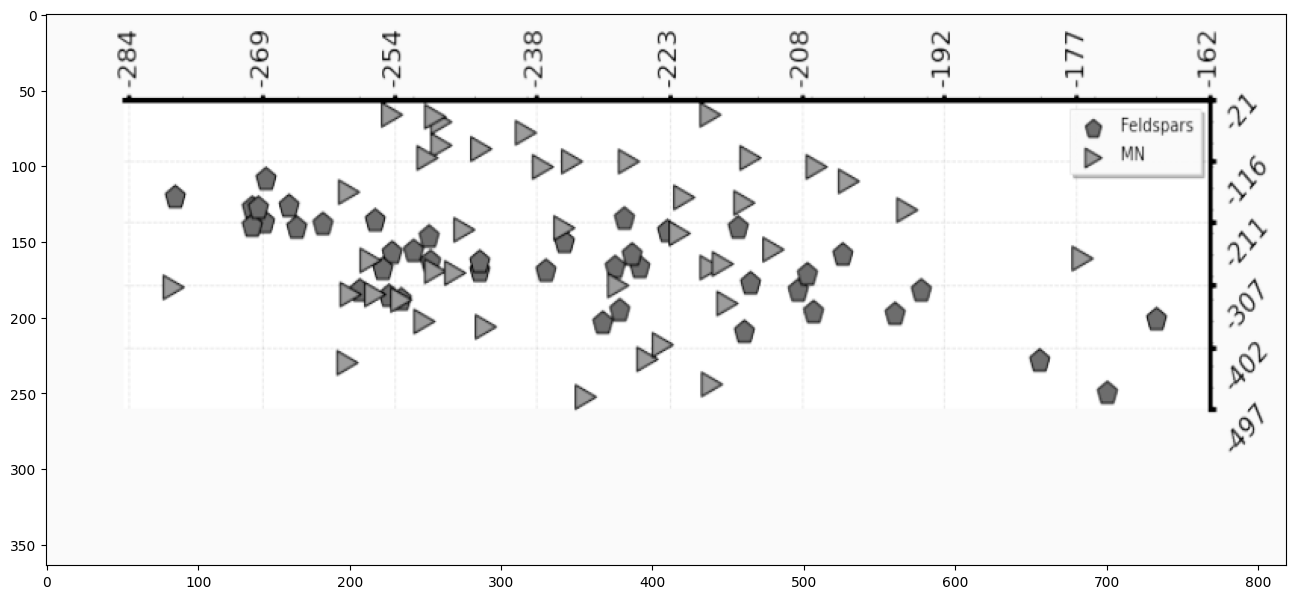

In [35]:
image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE) 
plot_gray(image)

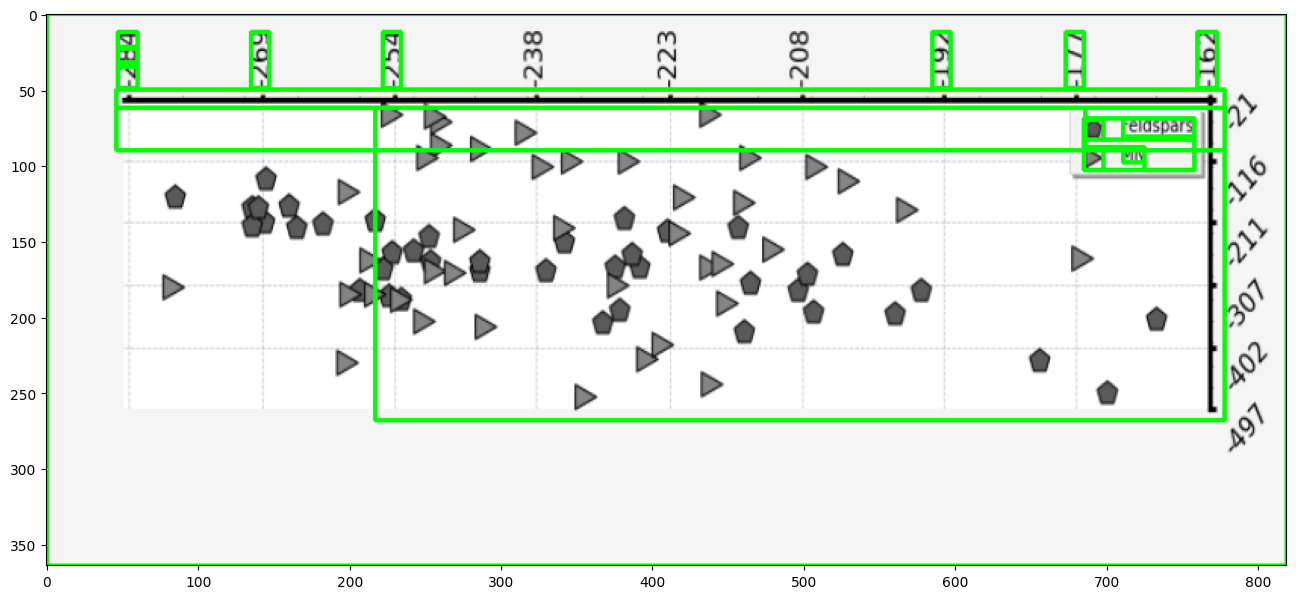

In [36]:
#pytesseract.pytesseract.tesseract_cmd = r'/usr/local/lib/python3.8/dist-packages/Tesseract-OCR/tesseract.exe'
d = pytesseract.image_to_data(image, output_type=Output.DICT)
n_boxes = len(d['level'])
boxes = cv2.cvtColor(image.copy(), cv2.COLOR_BGR2RGB)
for i in range(n_boxes):
    (x, y, w, h) = (d['left'][i], d['top'][i], d['width'][i], d['height'][i])    
    boxes = cv2.rectangle(boxes, (x, y), (x + w, y + h), (0, 255, 0), 2)
    
plot_rgb(boxes)

In [37]:
extracted_text = pytesseract.image_to_string(image)
print(extracted_text)

+
©
ry

 
  

-269

-254

-192

177

@ Feldspars
D> MN

-162

    



In [3]:
labels = pd.read_csv("./train_data/labels/labels.csv")

In [4]:
labels.shape

(5000, 2)

In [5]:
labels.isna().sum()

sample_name           0
marker_coordinates    0
dtype: int64

In [6]:
labels

,sample_name,marker_coordinates
0,20221201051038579586.png,"[(-75.04456758387215, 294.60046248707664, 0), ..."
1,20221201051038980373.png,"[(-825.6656002863295, -139.80908454124267, 0.0..."
2,20221201051039328360.png,"[(805.3957494691806, 41.54119842293201, 2), (5..."
3,20221201051039586510.png,"[(-249.1965077537486, -359.6091552982749, 1), ..."
4,20221201051039879736.png,"[(-196.2443035163055, -190.93903234556512, 1),..."
...,...,...
4995,20221201062508371667.png,"[(665.1181862695714, 18.62532762293843, 0), (6..."
4996,20221201062509354528.png,"[(-745.0448179976501, 47.07289129257695, 0), (..."
4997,20221201062510381834.png,"[(-190.82256339136507, 318.39978874782304, 0),..."
4998,20221201062511416035.png,"[(-343.79508969894465, 235.49866004554332, 2),..."


In [7]:
labels.marker_coordinates[0]

'[(-75.04456758387215, 294.60046248707664, 0), (-62.483853317710505, 298.95360939270773, 0), (-149.52104052930744, 304.37183757330354, 0), (-67.5857137453002, 293.9548767551092, 0), (-150.75685978348923, 305.4086771496499, 0), (-167.7069064052045, 309.2272726908242, 0), (32.169050978569416, 295.67099096545786, 0), (-109.62025054724799, 300.2698805637449, 0), (-242.68962719437405, 311.07437656889806, 0), (177.99999999999997, 295.7068200554371, 0), (-121.60109383448659, 305.1651851286027, 0), (-76.47719017265639, 309.91400475697657, 0), (-78.62573537117082, 303.65140107442494, 0), (-56.384681591959676, 304.70707561771263, 0), (-50.998984788711475, 300.0784676202468, 0), (-100.18936063521465, 299.54096847074635, 0), (-109.74963337748054, 311.08447821378826, 0), (-101.00955954055473, 300.9365886707614, 0), (33.72596659764868, 306.44612536776026, 0), (-80.54718458785874, 304.2661664436957, 0), (-156.26694005102246, 296.20403701330446, 0), (-210.84557959305786, 305.0595822713324, 0), (-170.4

In [58]:
labels.marker_coordinates[2].split("),")

['[(805.3957494691806, 41.54119842293201, 2',
 ' (527.8340717200474, -16.384743972863284, 1',
 ' (552.9099475275327, -82.74412238814304, 2',
 ' (280.84741705860375, -104.64267761750821, 2',
 ' (116.83343675774296, 42.31114182186931, 2',
 ' (608.2858150052806, -60.63358097584509, 1',
 ' (651.3294744473055, -38.27399464804397, 1',
 ' (609.6857680081192, 21.001064538580742, 2',
 ' (418.5876887298821, -98.53305924603235, 1',
 ' (681.3324768506769, 18.749510327842422, 0',
 ' (283.4949437296638, 21.371271170149953, 0',
 ' (582.2876435126486, -50.285090257304915, 0',
 ' (949.0, -109.0, 0',
 ' (19.0, -75.12136351359612, 1',
 ' (272.7430929347757, -41.85613912441058, 1',
 ' (472.37864251050223, -1.320330490445464, 0',
 ' (522.7412883335246, -34.84743256646884, 2',
 ' (856.9060495538129, -18.250488682216528, 0',
 ' (503.76533951586686, 10.875820379304763, 0',
 ' (564.8457677298594, 72.54280205001646, 2',
 ' (561.467566214756, 84.00000000000001, 1',
 ' (802.0342139845964, -10.391403311427247, 0',

In [70]:
len(labels.marker_coordinates[2])

1199

In [64]:
labels.marker_coordinates[2]

'[(805.3957494691806, 41.54119842293201, 2), (527.8340717200474, -16.384743972863284, 1), (552.9099475275327, -82.74412238814304, 2), (280.84741705860375, -104.64267761750821, 2), (116.83343675774296, 42.31114182186931, 2), (608.2858150052806, -60.63358097584509, 1), (651.3294744473055, -38.27399464804397, 1), (609.6857680081192, 21.001064538580742, 2), (418.5876887298821, -98.53305924603235, 1), (681.3324768506769, 18.749510327842422, 0), (283.4949437296638, 21.371271170149953, 0), (582.2876435126486, -50.285090257304915, 0), (949.0, -109.0, 0), (19.0, -75.12136351359612, 1), (272.7430929347757, -41.85613912441058, 1), (472.37864251050223, -1.320330490445464, 0), (522.7412883335246, -34.84743256646884, 2), (856.9060495538129, -18.250488682216528, 0), (503.76533951586686, 10.875820379304763, 0), (564.8457677298594, 72.54280205001646, 2), (561.467566214756, 84.00000000000001, 1), (802.0342139845964, -10.391403311427247, 0), (459.9313438402965, -34.02812859035025, 0), (334.42668742879107

In [72]:
labels.dtypes

sample_name           object
marker_coordinates    object
dtype: object

In [73]:
import re

In [75]:
pattern = re.compile("^.*\('(.*)'\).*$")

In [79]:
cordinates = re.findall(r"\((.*?)\)",labels.marker_coordinates[1])

In [81]:
cordinates[1].split(",")

['-821.1659204574487', ' -66.31143461667298', ' 0.0']

In [89]:
cordinates

['-825.6656002863295, -139.80908454124267, 0.0',
 '-821.1659204574487, -66.31143461667298, 0.0',
 '-749.7232467690142, -64.7036234712865, 0.0',
 '-747.7039462284422, -83.23976494917973, 0.0',
 '-668.0358910509102, -107.65904427847302, 0.0',
 '-629.2679626505163, -28.047592423836328, 0.0',
 '-625.6231283683975, -238.1307651700329, 0.0',
 '-578.0158969461069, -113.65530758049216, 0.0',
 '-557.4581939276404, -256.73889292519823, 0.0',
 '-496.05048700950755, -102.24671086717927, 0.0',
 '-489.724117420801, -63.97224056339974, 0.0',
 '-488.5293463588283, -384.7545892629605, 0.0',
 '-354.3121028647721, -34.83908896134891, 0.0',
 '-352.9514878105642, -104.39367178434381, 0.0',
 '-348.17990714241836, -60.861328751530365, 0.0',
 '-347.42496303276715, -175.18084828547197, 0.0',
 '-319.54558495401125, -385.0, 0.0',
 '-276.8466592081448, -19.999999999999957, 0.0',
 '-275.04919487296684, -102.74039275141025, 0.0',
 '-253.13041190321465, -77.00393115904951, 0.0',
 '-157.87856108012102, -40.8320401906

In [88]:
labels["x"] = [0] * labels.shape[0]
labels["y"] = [0] * labels.shape[0]
labels["label_integer"] = [0] * labels.shape[0]
labels

,sample_name,marker_coordinates,x,y,label_integer
0,20221201051038579586.png,"[(-75.04456758387215, 294.60046248707664, 0), ...",0,0,0
1,20221201051038980373.png,"[(-825.6656002863295, -139.80908454124267, 0.0...",0,0,0
2,20221201051039328360.png,"[(805.3957494691806, 41.54119842293201, 2), (5...",0,0,0
3,20221201051039586510.png,"[(-249.1965077537486, -359.6091552982749, 1), ...",0,0,0
4,20221201051039879736.png,"[(-196.2443035163055, -190.93903234556512, 1),...",0,0,0
...,...,...,...,...,...
4995,20221201062508371667.png,"[(665.1181862695714, 18.62532762293843, 0), (6...",0,0,0
4996,20221201062509354528.png,"[(-745.0448179976501, 47.07289129257695, 0), (...",0,0,0
4997,20221201062510381834.png,"[(-190.82256339136507, 318.39978874782304, 0),...",0,0,0
4998,20221201062511416035.png,"[(-343.79508969894465, 235.49866004554332, 2),...",0,0,0


In [443]:
arrays = np.empty(5000, dtype=np.object)

/tmp/ipykernel_32413/2312406855.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  arrays = np.empty(5000, dtype=np.object)


In [444]:
for i in range(labels.shape[0]):
    cordinates = re.findall(r"\((.*?)\)",labels.marker_coordinates[i])
    new_cordinates = []
    for n, cordinate in enumerate(cordinates):
        cordinate = cordinate.split(",")
        x = int(float(cordinate[0]))
        y = int(float(cordinate[1].replace(" ", "")))
        integer = int(float(cordinate[2].replace(" ", "")))
        new_cordinates.append([x, y, integer])
    arrays[i] = np.array(new_cordinates).flatten()

In [445]:
arrays[2].shape

(84,)

In [446]:
arrays.shape

(5000,)

In [478]:
newlabels = pd.read_csv("prepared_data.csv")

In [482]:
newlabels["results"] = arrays

In [254]:
for i in range(newlabels.shape[0]):
    newlabels["results"][i] = results[i]

In [483]:
newlabels["results"][i].shape

(102,)

In [378]:
newlabels["results"][2].shape

(28, 3)

In [484]:
newlabels.to_csv("prepared_data.csv", index=False)

In [493]:
newlabels[newlabels["sample_name"] == "20221201051038579586.png"].results[0]

array([ -75,  294,    0,  -62,  298,    0, -149,  304,    0,  -67,  293,
          0, -150,  305,    0, -167,  309,    0,   32,  295,    0, -109,
        300,    0, -242,  311,    0,  177,  295,    0, -121,  305,    0,
        -76,  309,    0,  -78,  303,    0,  -56,  304,    0,  -50,  300,
          0, -100,  299,    0, -109,  311,    0, -101,  300,    0,   33,
        306,    0,  -80,  304,    0, -156,  296,    0, -210,  305,    0,
       -170,  292,    0,  -49,  291,    0, -192,  304,    0,   21,  296,
          0,  -70,  300,    0,   15,  299,    0,  -29,  306,    0,  -75,
        295,    0,   -3,  301,    0,  -79,  302,    0, -178,  301,    0,
        -74,  298,    0,  114,  293,    0,  -62,  296,    0, -228,  308,
          0,   61,  292,    0, -253,  301,    0,   34,  303,    0, -104,
        302,    0, -182,  297,    0,  -95,  304,    0,  -90,  314,    0,
        -69,  301,    0, -207,  303,    0, -107,  301,    0, -107,  320,
          0,  112,  306,    0,  -60,  291,    0,   

In [486]:
newlabels

,sample_name,marker_coordinates,results
0,20221201051038579586.png,"[(-75.04456758387215, 294.60046248707664, 0), ...","[-75, 294, 0, -62, 298, 0, -149, 304, 0, -67, ..."
1,20221201051038980373.png,"[(-825.6656002863295, -139.80908454124267, 0.0...","[-825, -139, 0, -821, -66, 0, -749, -64, 0, -7..."
2,20221201051039328360.png,"[(805.3957494691806, 41.54119842293201, 2), (5...","[805, 41, 2, 527, -16, 1, 552, -82, 2, 280, -1..."
3,20221201051039586510.png,"[(-249.1965077537486, -359.6091552982749, 1), ...","[-249, -359, 1, -436, -368, 3, -278, -359, 0, ..."
4,20221201051039879736.png,"[(-196.2443035163055, -190.93903234556512, 1),...","[-196, -190, 1, -265, -217, 0, -218, -457, 1, ..."
...,...,...,...
4995,20221201062508371667.png,"[(665.1181862695714, 18.62532762293843, 0), (6...","[665, 18, 0, 661, 82, 1, 660, -244, 1, 690, -8..."
4996,20221201062509354528.png,"[(-745.0448179976501, 47.07289129257695, 0), (...","[-745, 47, 0, -283, 85, 3, -515, 145, 2, -397,..."
4997,20221201062510381834.png,"[(-190.82256339136507, 318.39978874782304, 0),...","[-190, 318, 0, -306, 181, 0, -528, 318, 0, -46..."
4998,20221201062511416035.png,"[(-343.79508969894465, 235.49866004554332, 2),...","[-343, 235, 2, -292, 57, 2, -198, -49, 1, -216..."


In [581]:
DATA_DIR = "./train_data/images/"
path_images = DATA_DIR      
images_ids = next(os.walk(path_images))[2]

test_ids = random.sample(images_ids, int(len(images_ids)*0.2))
images_ids = [id for id in images_ids if id not in test_ids]
valid_ids = random.sample(images_ids, len(test_ids))
images_ids = [id for id in images_ids if id not in valid_ids]
train_ids = images_ids

print(len(train_ids), len(test_ids), len(valid_ids))  # for QC

im_height = 64    # new height
im_width = 64    # new width
im_chan = 1 

X_train = np.zeros((len(images_ids), im_height, im_width), dtype=np.uint8)
X_test = np.zeros((len(test_ids), im_height, im_width), dtype=np.uint8)
X_valid = np.zeros((len(valid_ids), im_height, im_width), dtype=np.uint8)


def create_data_from_ids(ids, X_empty):
  ys = np.empty(len(ids), dtype=np.object)
  for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):
    
    img = load_img(path_images + id_)
    x = img_to_array(img)[:,:,0]
    x = resize(x, (im_height, im_height), mode='constant', preserve_range=True)
    X_empty[n] = x
    ys[n] = newlabels.loc[newlabels.sample_name == id_]["results"].values[0]
    #ys[n] = (newlabels[newlabels["sample_name"] == id_].results)[0]
#     ys.append(y)

  print('Done!')
  return X_empty, ys

X_train, Y_train = create_data_from_ids(train_ids, X_train)
X_test, Y_test = create_data_from_ids(test_ids, X_test)
X_valid, Y_valid = create_data_from_ids(valid_ids, X_valid)

3000 1000 1000


/tmp/ipykernel_32413/2866166379.py:23: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ys = np.empty(len(ids), dtype=np.object)
/tmp/ipykernel_32413/2866166379.py:24: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n, id_ in tqdm_notebook(enumerate(ids), total=len(ids)):



Done!



Done!



Done!


In [544]:
X_valid.shape, Y_valid.shape

((1000, 64, 64), (1000,))

In [546]:
Y_valid[0]

numpy.ndarray

In [616]:
import segmentation_models_pytorch as smp
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import albumentations as A
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random
import os
import numpy as np
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
from skimage.transform import resize
from tqdm import tqdm_notebook
from tensorflow.keras.preprocessing.image import load_img, img_to_array

class PrepareDataset(Dataset):
    def __init__(self, X, y, is_train=False):
        super().__init__()
        self.is_train = is_train
        self.X = X.astype('float32')
        self.y = y#.astype('float32')
        self.aug = A.Compose([             
            A.ShiftScaleRotate(p=0.35, shift_limit=0, scale_limit=0.30, rotate_limit=30) ,    
            A.Resize(64, 64),
            A.HorizontalFlip(p=0.5),                  
        ])

    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self,index):
        data = self.X[index,:,:]
        label = self.y[index].reshape(int(self.y[index].shape[0]/3), 3)
        if self.is_train:
          data_aug = self.aug(image=data, mask=label)
          data, label = data_aug['image'], data_aug['mask']          
          return data[None, :, :], label
        else:
          return data[None, :, :], label

In [617]:
Y_valid.shape

(1000,)

In [618]:
train_data = PrepareDataset(X_train, Y_train, is_train=True)
test_data = PrepareDataset(X_test, Y_test, is_train=True)
valid_data = PrepareDataset(X_valid, Y_valid, is_train=True)

In [619]:
valid_data[0][1].shape, valid_data[0][0].shape

((64, 64), (1, 64, 64))

In [599]:
data_get[0].shape, data_get[1].shape

((1, 64, 64), (81, 3))

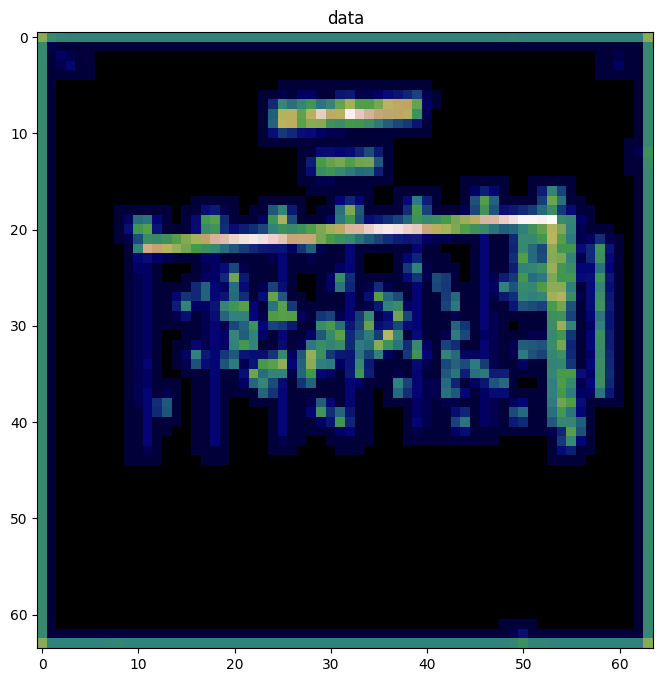

In [600]:
no_sample = random.randint(0, X_valid.shape[0])
data_get = valid_data[no_sample]
fig, ax = plt.subplots(1,1, sharey=True, figsize=(8,8))
ax.imshow(data_get[0][0, :, :], cmap='gist_earth_r')
ax.set_title('data')
plt.show()

In [624]:
BATCH_SIZE =  32
NUM_EPOCHS = 30
NUM_CLASSES = 8 
LEARNING_RATE = 0.001

def get_data_loaders(batch_size):
    train_data = PrepareDataset(X_train, Y_train, is_train=True)
    test_data = PrepareDataset(X_test, Y_test, is_train=True)
    valid_data = PrepareDataset(X_valid, Y_valid, is_train=True)
    train_loader = DataLoader(dataset = train_data, batch_size = batch_size, shuffle=True, drop_last=True)
    test_loader = DataLoader(dataset = test_data, batch_size = batch_size, shuffle=False, drop_last=True)
    valid_loader = DataLoader(dataset = valid_data, batch_size = batch_size, shuffle=False, drop_last=True)
    return train_loader, test_loader, valid_loader

In [637]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu') #CPU/GPU selection
train_loader, test_loader, valid_loader = get_data_loaders(BATCH_SIZE)
use_amp = True

In [642]:
model =  smp.Unet(
    encoder_name="efficientnet-b0", 
    in_channels=1,                  
    classes=8)  # identify 8 classes (no seep, and 7 seep types)
#model.to(device)
if True:
    params_to_update = []
    for name,param in model.named_parameters():
        if param.requires_grad == True:
            params_to_update.append(param)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params_to_update,lr = LEARNING_RATE)
train_losses = []
test_losses = []
train_iou = []
test_iou = []
IOU_old = 0.0
MODEL_DIR = "/content/drive/MyDrive/seeps-detection/model/"
SMOOTH = 1e-6

In [639]:
device

device(type='cuda', index=0)

In [644]:
def iou_numpy(outputs: np.array, labels: np.array):
    "intersection over union calculation as evaluation metric"
    outputs = outputs.astype(int)
    intersection = (outputs & labels).sum((1, 2))
    union = (outputs | labels).sum((1, 2))
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    thresholded = np.ceil(np.clip(20 * (iou - 0.5), 0, 10)) / 10
    return thresholded.mean()

# run training and evaluation
for epoch in range(1, NUM_EPOCHS + 1):
    train_loss = 0.0
    valid_loss = 0.0  
    iou_train = 0.0
    iou_test = 0.0
    model.train()
    for data, label in train_loader:
        data = data#.to(device)
        label = label#.to(device)
        optimizer.zero_grad()
        output = model(data.float())
        pred = output.data.max(1)[1].cpu().numpy()[:, :, :]
        loss = criterion(output, label.long())
        iou = iou_numpy(label.cpu().numpy(), pred)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        iou_train += iou
    model.eval()
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)
        output = model(data.float())
        pred = output.data.max(1)[1].cpu().numpy()[:, :, :]
        loss = criterion(output, label.long())  
        iou = iou_numpy(label.cpu().numpy(), pred) 
        valid_loss += loss.item() * data.size(0)
        iou_test += iou
    train_loss = train_loss/len(train_loader.sampler)   
    iou_train = iou_train/len(train_loader.sampler)*BATCH_SIZE  
    valid_loss = valid_loss/len(test_loader.sampler)*BATCH_SIZE
    iou_test = iou_test/len(test_loader.sampler)*BATCH_SIZE
    train_losses.append(train_loss)
    test_losses.append(valid_loss) 
    train_iou.append(iou_train)
    test_iou.append(iou_test)    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tiou_train: {:.6f} \tiou_test: {:.6f}'.format(
        epoch, train_loss, valid_loss,  iou_train, iou_test))
    
    if IOU_old < iou_test:
        IOU_old = iou_test
        print('Saving new best model with mean iou -', iou_test, '\n')
        torch.save(model.state_dict(), MODEL_DIR + 'model_6_1_final.ckpt')

IndexError: Target 355 is out of bounds.

In [645]:
def iou_numpy(outputs: np.array, labels: np.array) -> np.int64:
    outputs = outputs.astype(int)
    intersection = (outputs & labels).sum((1, 2))
    union = (outputs | labels).sum((1, 2))
    iou = (intersection + SMOOTH) / (union + SMOOTH)
    thresholded = np.ceil(np.clip(20 * (iou - 0.5), 0, 10)) / 10
    return thresholded.mean()

# run training and evaluation
for epoch in range(1, NUM_EPOCHS + 1):
    train_loss = 0.0
    valid_loss = 0.0  
    iou_train = 0.0
    iou_test = 0.0
    model.train()
    for data, label in train_loader:
        data = data#.to(device)
        label = label#.to(device)
        optimizer.zero_grad()
        output = model(data.float())
        pred = output.data.max(1)[1].cpu().numpy()[:, :, :]
        loss = criterion(output, label.long())
        iou = iou_numpy(label.cpu().numpy(), pred)
        loss.backward()
        optimizer.step()
        train_loss += loss.item() * data.size(0)
        iou_train += iou
    model.eval()
    for data, label in test_loader:
        data = data.to(device)
        label = label.to(device)
        output = model(data.float())
        pred = output.data.max(1)[1].cpu().numpy()[:, :, :]
        loss = criterion(output, label.long())  
        iou = iou_numpy(label.cpu().numpy(), pred) 
        valid_loss += loss.item() * data.size(0)
        iou_test += iou
    train_loss = train_loss/len(train_loader.sampler)   
    iou_train = iou_train/len(train_loader.sampler)*BATCH_SIZE  
    valid_loss = valid_loss/len(test_loader.sampler)*BATCH_SIZE
    iou_test = iou_test/len(test_loader.sampler)*BATCH_SIZE
    train_losses.append(train_loss)
    test_losses.append(valid_loss) 
    train_iou.append(iou_train)
    test_iou.append(iou_test)    
    print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tiou_train: {:.6f} \tiou_test: {:.6f}'.format(
        epoch, train_loss, valid_loss,  iou_train, iou_test))
    
    if IOU_old < iou_test:
        IOU_old = iou_test
        print('Saving new best model with mean iou -', iou_test, '\n')
        torch.save(model.state_dict(), MODEL_DIR + 'model_6_1_final.ckpt')

IndexError: Target -262 is out of bounds.